## Setup

In [1]:
from typing import List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from src.model_cluster import (get_a_mod_list_and_dict, cluster_selection_plot,
                               summary_kmeans, summary_plot, lift_plot)


## Load Data

In [2]:
df = pd.read_csv('data/pokemon.csv')

## Explore Data

In [3]:
df.shape

(801, 41)

In [4]:
df.head(2)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0


In [5]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

## Clean Data

In [6]:
def get_col(df, key_word):
    return [col for col in df.columns if col.startswith(key_word)]

In [7]:
against_feature = get_col(df, 'against_')
base_feature = get_col(df, 'base_')
sp = get_col(df, 'sp_')
important_basic = ['hp', 'attack', 'defense', 'speed']

In [8]:
select_features = sp + important_basic
select_features

['sp_attack', 'sp_defense', 'hp', 'attack', 'defense', 'speed']

In [9]:
df_input = df[select_features]

In [10]:
std_scale = StandardScaler()
df_scale = pd.DataFrame(std_scale.fit_transform(df_input), columns=df_input.columns)

## Modeling

In [11]:
cluster_range = range(3, 12)

In [12]:
mod_dict, mod_list = get_a_mod_list_and_dict(df_scale, cluster_range)

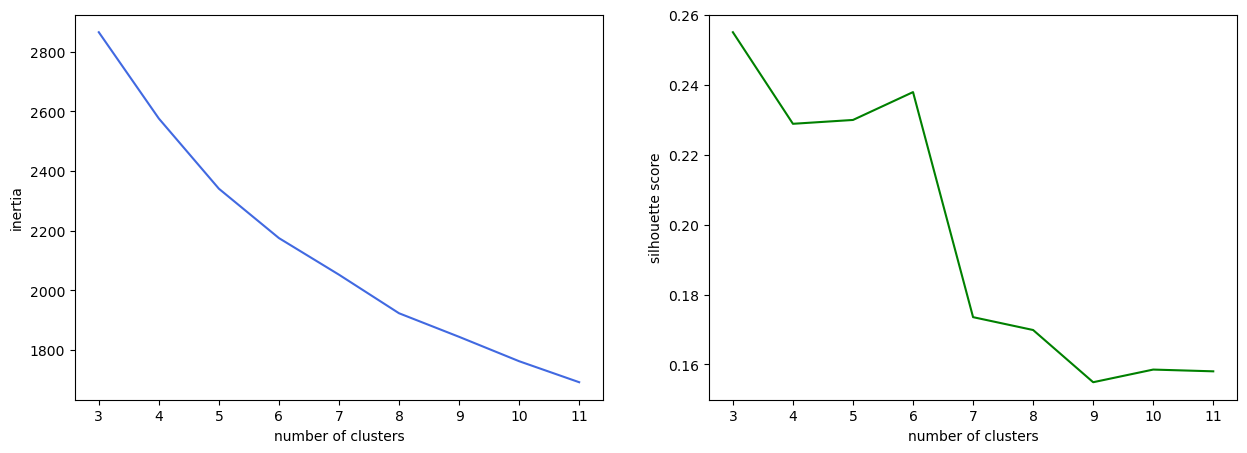

In [13]:
cluster_selection_plot(df_scale, mod_list, cluster_range)

<div class="alert alert-info">We choose k = 6 because it produces a silhouette score that is better than the surrounding choices of $k$ and $k$ equals to 3 is too small for our use case. </div>

In [14]:
k_final = 6

In [15]:
final_mod = mod_dict[str(k_final)]

## Explore Cluster

In [16]:
df_sum = summary_kmeans(df_scale, final_mod)

In [17]:
df_sum

,count,percent,sp_attack,sp_defense,hp,attack,defense,speed
0,289,0.360799,-0.740377,-0.824052,-0.727766,-0.752670,-0.733624,-0.582302
1,120,0.149813,-0.325694,-0.003093,0.321275,0.973404,0.991316,-0.284459
2,42,0.052434,0.191569,0.358718,2.314424,-0.097807,-0.185341,-0.490416
3,91,0.113608,0.491159,1.325395,-0.017895,-0.358353,0.905641,-0.508357
4,157,0.196005,0.262585,-0.006406,-0.014756,0.107485,-0.292553,1.027957
5,102,0.127341,1.559659,1.018146,0.769714,1.181921,0.630994,1.057736


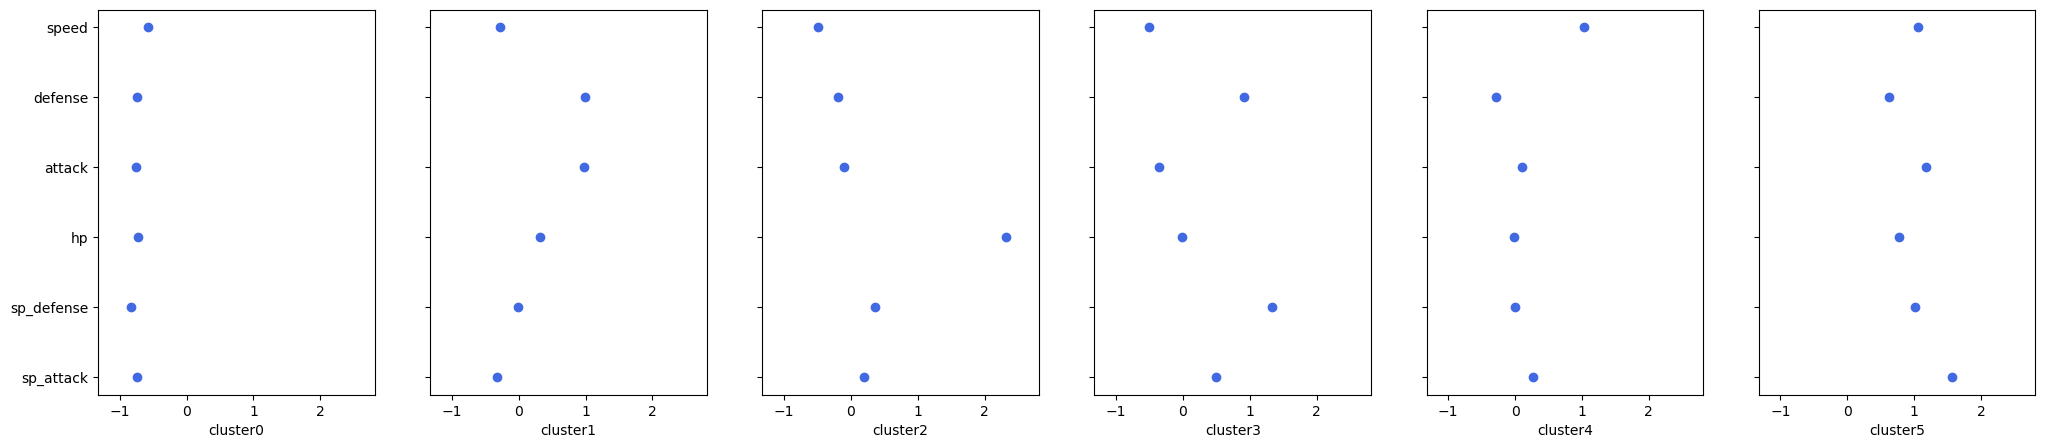

In [18]:
summary_plot(df_scale, final_mod)

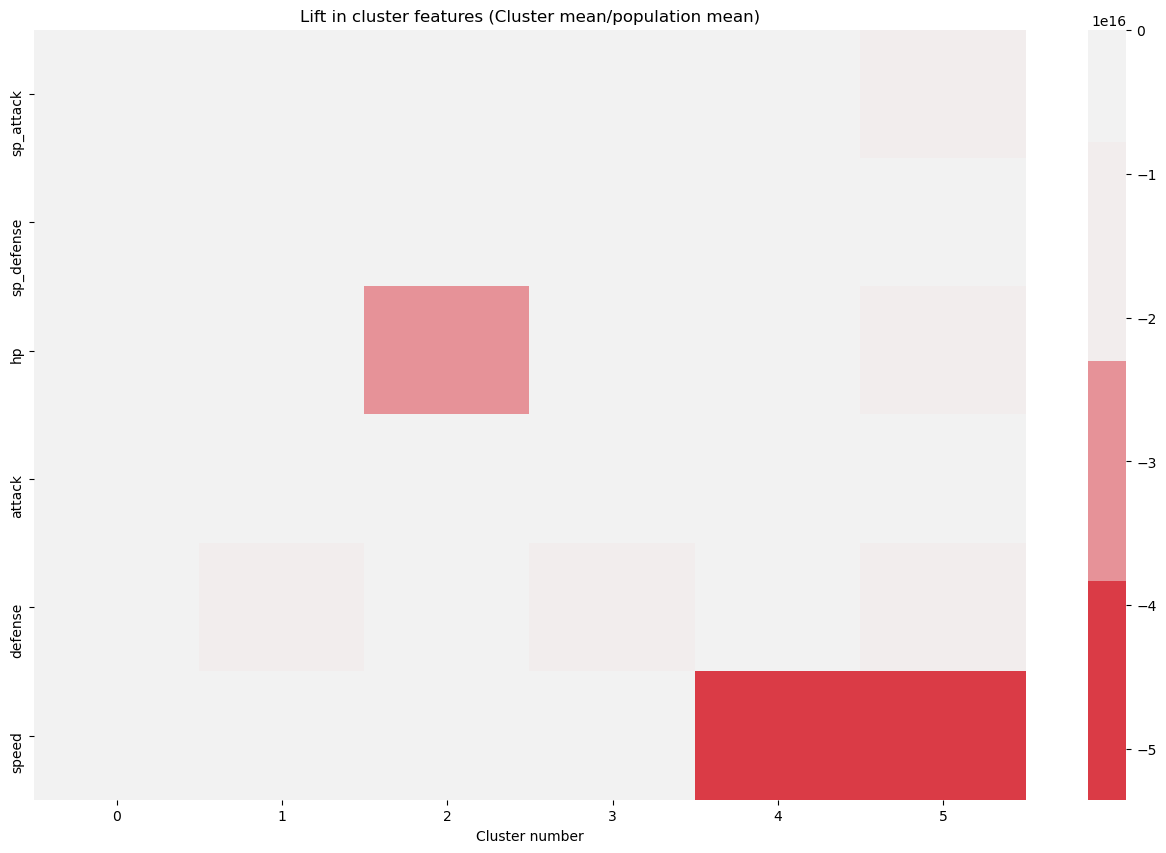

In [19]:
lift_plot(df_scale, final_mod, select_features)